In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

### Chile

In [2]:
# Columns of the datasets
Geo_cat = ['CHI ID COM']#'BRA ID MIR'
HS_cat = ['HS ID 6']
ind_cat = ['CIIU ID 4']


var = 'output_USD' # 'output_USD'
var_str = '_o'
var_lab_str = 'Output of '# 'Output of ' #'Wages in '

In [3]:
#Choose a configuration for further aggregation.


ctry_str = Geo_cat[0][:3]
geo_str = Geo_cat[0][-3:]

confs = [('1', '1', '1'),
         ('1', '1', '2'),
         ('1', '2', '1'),
         ('1', '2', '2'),
         ('2', '1', '1'),
         ('2', '1', '2'),
         ('2', '2', '1'),
         ('2', '2', '2'),
         ('2', '2', '4'),
         ('2', '4', '2'),
         ('2', '4', '4'),
         ('4', '2', '2'),
         ('4', '2', '4'),
         ('4', '4', '2'),
         ('4', '4', '4')]

for conf in confs:
    (CIIU_lev, HS_Exp, HS_Imp) = conf
    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
    print col_name

CHI_COM_1_1_1_o
CHI_COM_1_1_2_o
CHI_COM_1_2_1_o
CHI_COM_1_2_2_o
CHI_COM_2_1_1_o
CHI_COM_2_1_2_o
CHI_COM_2_2_1_o
CHI_COM_2_2_2_o
CHI_COM_2_2_4_o
CHI_COM_2_4_2_o
CHI_COM_2_4_4_o
CHI_COM_4_2_2_o
CHI_COM_4_2_4_o
CHI_COM_4_4_2_o
CHI_COM_4_4_4_o


('4', '4', '4')


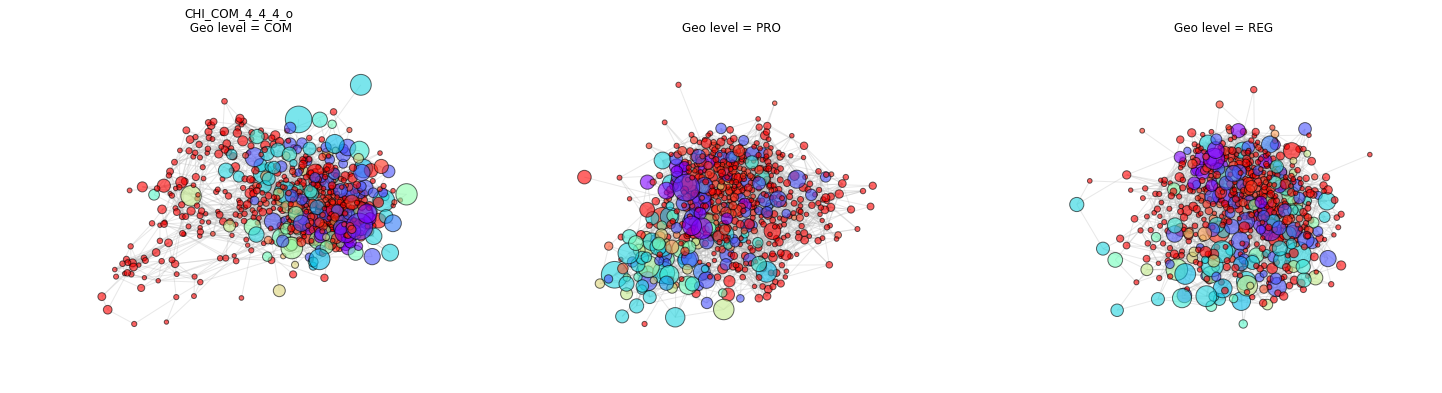

In [5]:
max_d = 10
k = 0.05
geo_levels = ['COM','PRO','REG']
l = len(geo_levels)
var_str = '_o'

for j in [len(confs) -1]:
    conf = confs[j]
    k = .05
    #trick for fixing layout in _o
    if j < 8:
        k = .12   
    
    #trick for fixing layout in _w
#     if j % 2:
#         k = .05
#         print k
    fig, axs = plt.subplots(1, l, figsize = (25, 6))
    
    (CIIU_lev, HS_Exp, HS_Imp) = conf
#     (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf
    print conf
    
    for i in range(l): 
        geo_str = geo_levels[i]

        col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
    

        nodes = pd.read_csv('data/node_refs/'+col_name+'_nodes_meta.csv', index_col = 0)
        edges = pd.read_csv('data/node_refs/'+col_name+'_edges.csv', index_col = 0)
        
#         print 'max degree: '+str(max_d)

            ### Max degree = max_d
        df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
        df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
        edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight_'+geo_str]).reset_index(drop = True)


        G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight_'+geo_str)
        # nx.write_gexf(G,'networks/'+col_name+'.gexf')

#         print 'nodes: '+str(len(G.nodes()))
#         print 'edges: '+str(len(G.edges()))

#         Main component
#         grcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
#         G0=grcc[0]
#         G = G0

        # Subset of nodes
        nodes = nodes.set_index('node_name').loc[G.nodes()]

        #Perform Graph Drawing
        ax = axs[i]

        pos = nx.spring_layout(G, k=k)

        nx.draw(G, pos, node_size = nodes.node_size.values, alpha=.6, node_color= list(nodes.color.values), edgelist = [], ax = ax)
        nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3, ax = ax)
        ax.set_title('Geo level = '+str(geo_str))
        if i == 0:
            ax.set_title(col_name+'\n Geo level = '+geo_str)
    plt.savefig('./Figures/2_geolayer/'+col_name+'_plot1.png')
    plt.show()

### node color refce

In [61]:
# Load info
path = 'data/disagg_struct_refs/formatted/'

# CIIU = pd.read_csv(path+'CIIU_full.csv')
# CBO = pd.read_csv(path+'CBO_full.csv').astype(str)
CNAE = pd.read_csv(path+'CNAE_full.csv').astype(str)
# HS = pd.read_csv(path+'hs_full.csv').astype(str)

# CIIU['CIIU label 2'] = CIIU['CIIU ID 2'].astype(str)
# CIIU['CIIU label 1'] = CIIU['CIIU ID 1'].astype(str)
# CIIU['CIIU label 0'] = 'All industries'

ref = nodes.reset_index()[['att_A', 'color']].drop_duplicates().sort_values(by = 'att_A').reset_index(drop = True)
ref = ref.merge(CNAE[['CNAE ID S', 'CNAE label S']].drop_duplicates(), how = 'left', left_on = 'att_A', right_on = 'CNAE ID S')
ref = ref[['CNAE label S', 'att_A', 'color']].fillna('')
ref['color'] = ref['color'].str.upper()
print ref.to_latex()

\begin{tabular}{llll}
\toprule
{} &                                       CNAE label S &    att\_A &    color \\
\midrule
0  &  Agricultura, pecuaria, producao florestal, pes... &        A &  \#8000FF \\
1  &                              Industrias extrativas &        B &  \#CCE385 \\
2  &                        Industrias de transformacao &        C &  \#6628FE \\
3  &                                 Eletricidade e gas &        D &  \#4C4FFC \\
4  &  Agua, esgoto, atividades de gestao de residuos... &        E &  \#3374F8 \\
5  &                                                    &  Exports &  \#FF2814 \\
6  &                                         Construcao &        F &  \#1996F3 \\
7  &  Comercio; reparacao de veiculos automotores e ... &        G &  \#00B4EC \\
8  &                  Transporte, armazenagem e correio &        H &  \#1ACEE3 \\
9  &                           Alojamento e alimentacao &        I &  \#33E3D9 \\
10 &                                                    & 

### Brazil

In [8]:
# Columns of the datasets
Geo_cat = ['BRA ID ST']#'BRA ID MIR'
HS_cat = ['HS ID 4']
ind_cat = ['CNAE ID C', 'CBO ID F']

var = 'Total Yearly Wages' # 'output_USD'
var_str = '_w'
var_lab_str = 'Wages in '# 'Output of ' #'Wages in '

In [34]:
#Choose a configuration for further aggregation.

confs = [('0', 'S', '1', '1'),
         ('0', 'S', '1', '2'),
         ('0', 'S', '2', '1'),
         ('0', 'S', '2', '2'),
         ('GG', '0', '1', '1'),
         ('GG', '0', '1', '2'),
         ('GG', '0', '2', '1'),
         ('GG', '0', '2', '2'),
         ('GG', 'S', '1', '1'),
         ('GG', 'S', '1', '2'),
         ('GG', 'S', '2', '1'),
         ('GG', 'S', '2', '2'),
         ('0', 'D', '1', '1'),
         ('0', 'D', '1', '2'),
         ('0', 'D', '2', '1'),
         ('0', 'D', '2', '2'),
         ('SGP', '0', '1', '1'),
         ('SGP', '0', '1', '2'),
         ('SGP', '0', '2', '1'),
         ('SGP', '0', '2', '2'),
         
         ('GG', 'D', '2', '2'),
         ('GG', 'D', '2', '4'),
         ('GG', 'D', '4', '2'),
         ('GG', 'D', '4', '4'),
         ('SGP', 'S', '2', '2'),
         ('SGP', 'S', '2', '4'),
         ('SGP', 'S', '4', '2'),
         ('SGP', 'S', '4', '4'),
         ('0', 'G', '2', '2'),
         ('0', 'G', '2', '4'),
         ('0', 'G', '4', '2'),
         ('0', 'G', '4', '4'),
         ('SG', '0', '2', '2'),
         ('SG', '0', '2', '4'),
         ('SG', '0', '4', '2'),
         ('SG', '0', '4', '4')]

confs = [#('GG', '0', '1', '1'),
#          ('GG', '0', '1', '2'),
         ('GG', '0', '2', '1'),
#          ('0', 'S', '1', '1'),
#          ('0', 'S', '1', '2'),
         ('0', 'S', '2', '1'),
#          ('0', 'S', '2', '2'),
#          ('SGP', '0', '1', '2'),
         ('SGP', '0', '2', '1'),
#          ('SGP', '0', '2', '2'),
         ('SG', '0', '4', '2'),
#          ('SG', '0', '2', '4'),
#          ('0', 'G', '2', '4'),
#          ('SG', '0', '4', '4'),
         ('0', 'G', '4', '4'),
         ('SGP', 'S', '4', '4'),
        ('GG', 'D', '4', '4')]


ctry_str = Geo_cat[0][:3]
geo_str = Geo_cat[0][-3:]

for conf in confs:
#     (CIIU_lev, HS_Exp, HS_Imp) = conf
    (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf
    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
#     print col_name

('GG', '0', '2', '1')


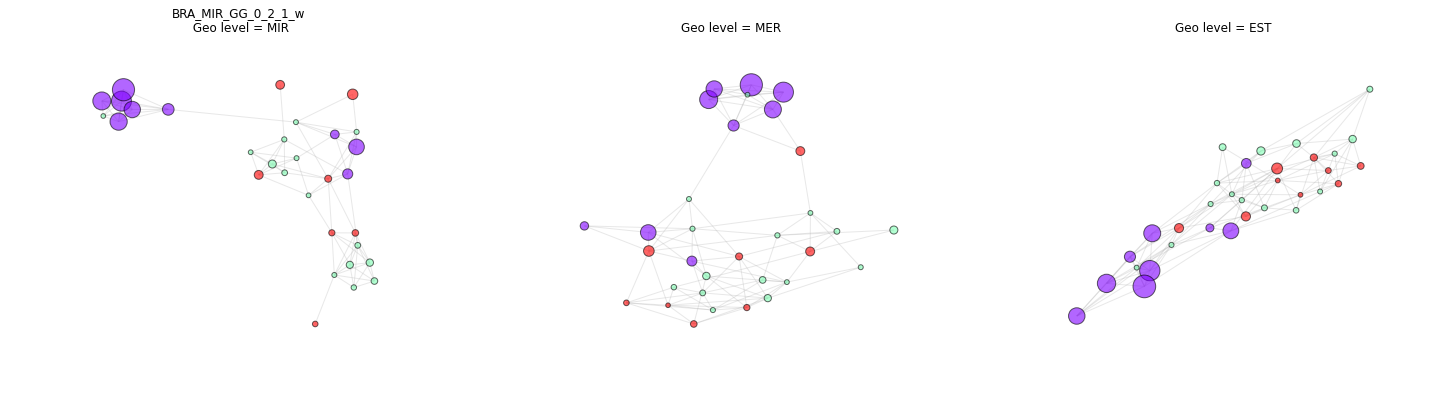

('0', 'S', '2', '1')


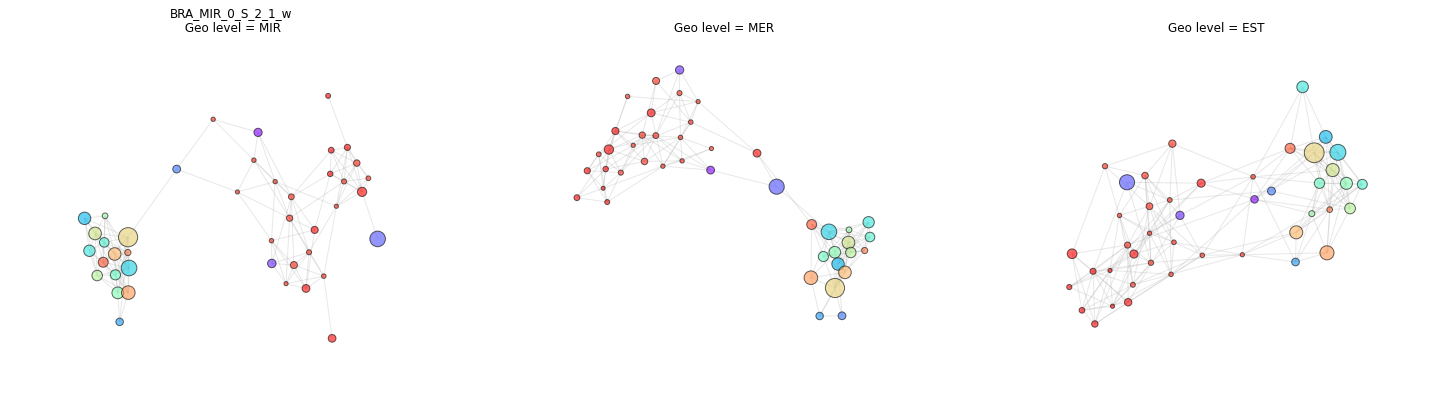

('SGP', '0', '2', '1')


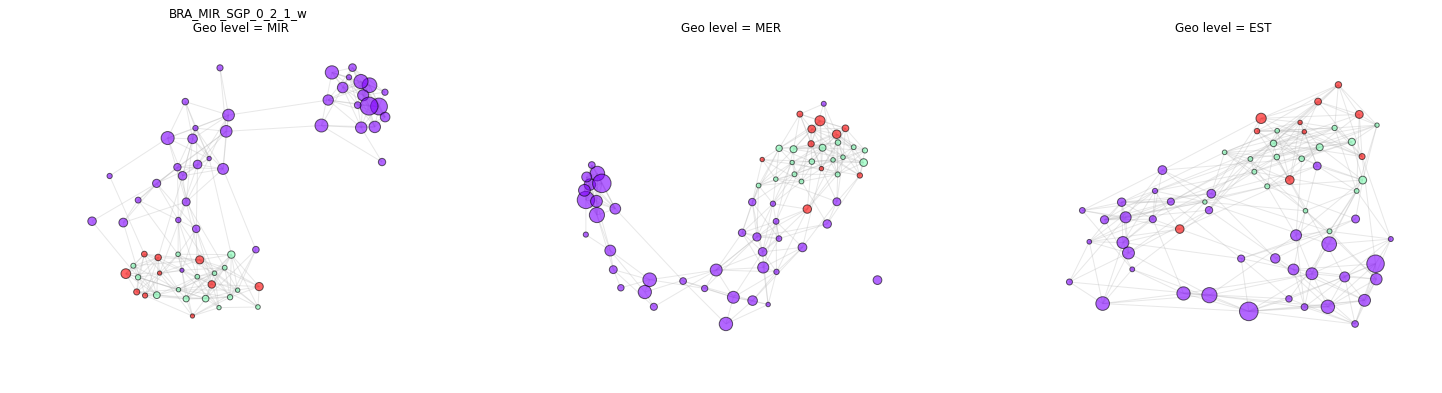

('SG', '0', '4', '2')


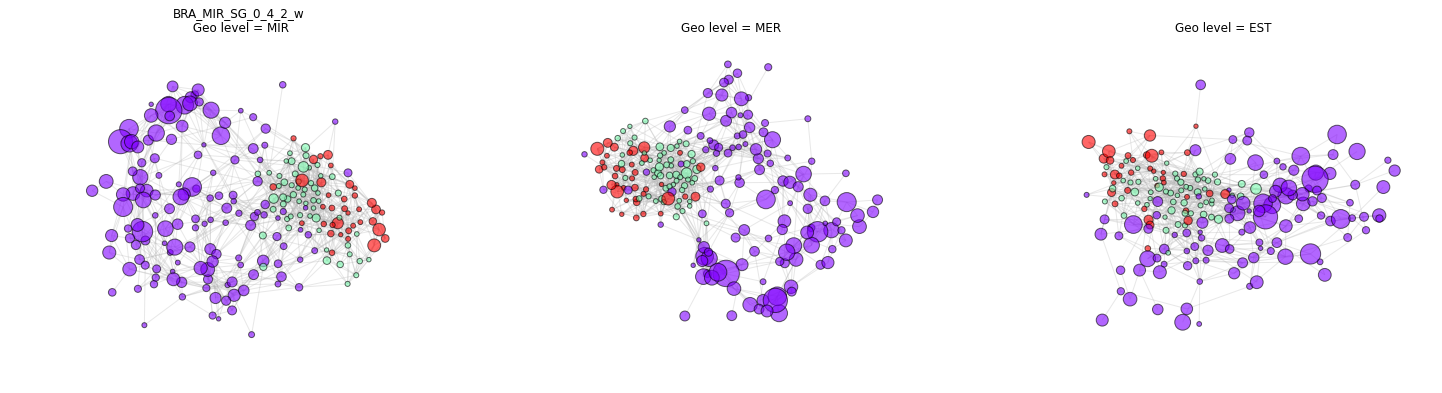

('0', 'G', '4', '4')


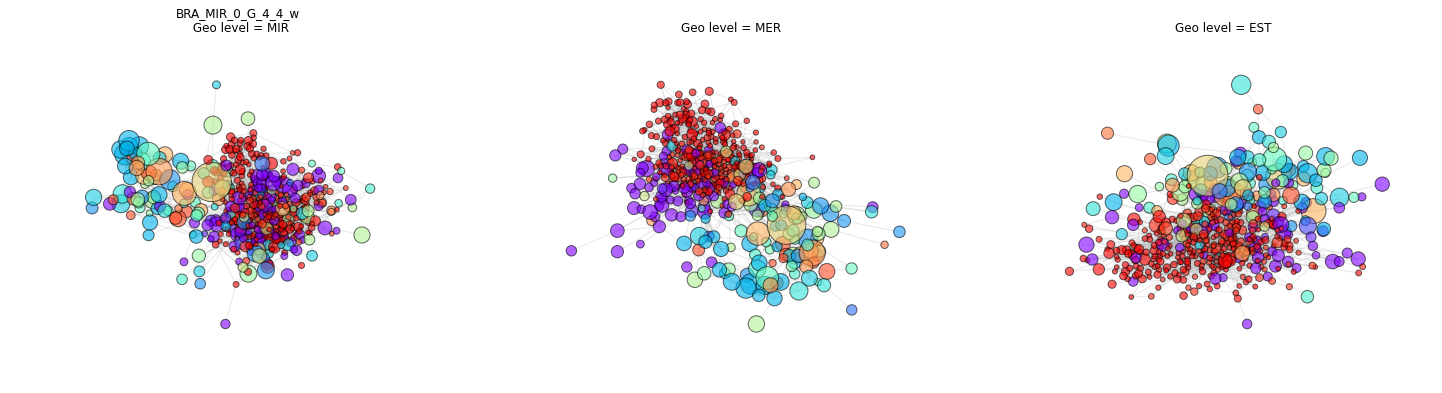

('SGP', 'S', '4', '4')


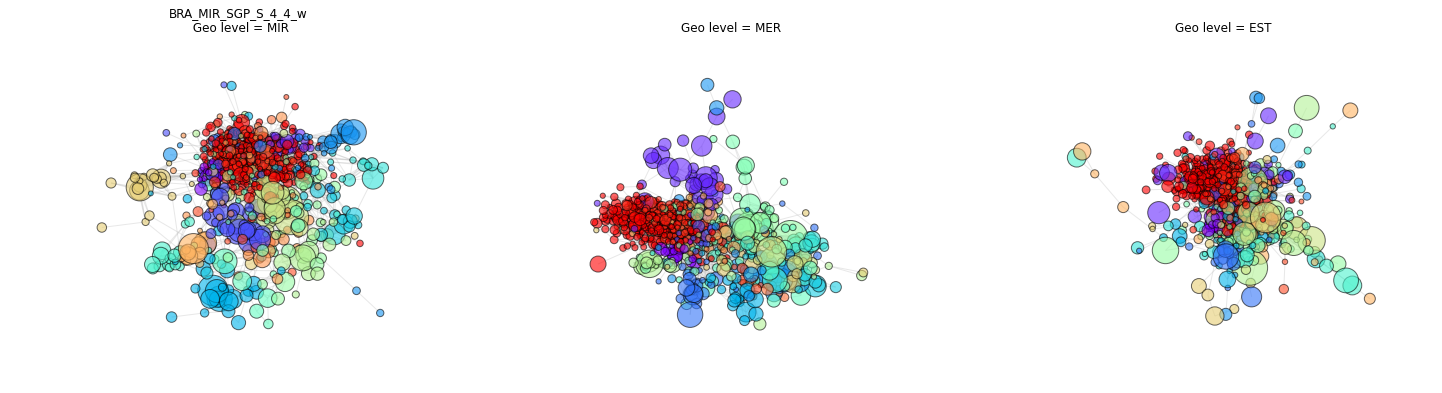

('GG', 'D', '4', '4')


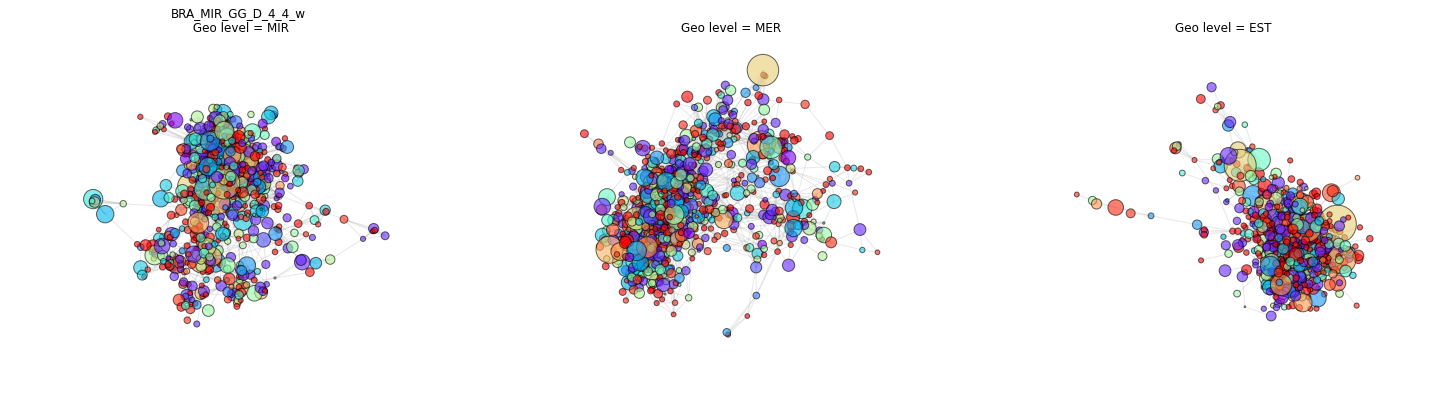

In [42]:
max_d = 10
geo_levels = ['MIR','MER','EST']
l = len(geo_levels)

k = .1

for j in range(len(confs)):
    
    if j == 3:
        k = .05
    conf = confs[j]

    fig, axs = plt.subplots(1, l, figsize = (25, 6))

#     (CIIU_lev, HS_Exp, HS_Imp) = conf
    (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf
    print conf

    for i in range(l): 
        geo_str = geo_levels[i]

        col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str


        nodes = pd.read_csv('data/node_refs/'+col_name+'_nodes_meta.csv', index_col = 0)
        edges = pd.read_csv('data/node_refs/'+col_name+'_edges.csv', index_col = 0)

#         print 'max degree: '+str(max_d)

            ### Max degree = max_d
        df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
        df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
        edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight_'+geo_str]).reset_index(drop = True)


        G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight_'+geo_str)
        # nx.write_gexf(G,'networks/'+col_name+'.gexf')

#         print 'nodes: '+str(len(G.nodes()))
#         print 'edges: '+str(len(G.edges()))

#         Main component
        if len(nodes) > 100:
            grcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
            G0=grcc[0]
            G = G0

        # Subset of nodes
        nodes = nodes.set_index('node_name').loc[G.nodes()]

        #Perform Graph Drawing
        ax = axs[i]

        pos = nx.spring_layout(G, k=k)

        nx.draw(G, pos, ax = ax, node_size = 5*nodes.node_size.values, alpha=.6, node_color= list(nodes.color.values), edgelist = [])

        nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3, ax = ax)

        ax.set_title('Geo level = '+str(geo_str))
        if i == 0:
            ax.set_title(col_name+'\n Geo level = '+geo_str)
    plt.savefig('./Figures/2_geolayer/'+col_name+'_plot2.png')
    plt.show()